[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/francisco-ortin/data-science-course/blob/main/unsupervised/k_means.ipynb)
[![License: CC BY-NC-SA 4.0](https://img.shields.io/badge/License-CC%20BY--NC--SA%204.0-lightgrey.svg)](https://creativecommons.org/licenses/by-nc-sa/4.0/)

# K-means clustering

[K-means](https://en.wikipedia.org/wiki/K-means_clustering) is a simple and widely used [clustering](https://en.wikipedia.org/wiki/Cluster_analysis) algorithm. In this notebook, we will use the K-Means algorithm to cluster the iris dataset. We will also use the [elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)) and [silhouette score](https://en.wikipedia.org/wiki/Silhouette_(clustering)) to find the optimal number of clusters.

The [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) is a popular dataset in machine learning. It contains 150 samples of iris flowers. Each sample has 4 features: sepal length, sepal width, petal length, and petal width. The dataset is divided into 3 classes: setosa, virginica, and versicolor.

<img src="https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg" width="800">

In [10]:
# make sure the required packages are installed
%pip install pandas numpy seaborn matplotlib scikit-learn  --quiet
repo='data-science-course'
module='unsupervised'
# if running in colab, install the required packages and copy the necessary files
if get_ipython().__class__.__module__.startswith('google.colab'):
    import os
    if not os.path.exists(repo):
        !git clone --filter=blob:none --sparse https://github.com/francisco-ortin/data-science-course.git  2>/dev/null
        !cd {repo} && git sparse-checkout init --cone && git sparse-checkout set {module}  2>/dev/null
    !cp --update {repo}/{module}/*.py . 2>/dev/null
    !mkdir -p img data
    !mv {repo}/{module}/img/* img/.  2>/dev/null
    !mv {repo}/{module}/data/* data/.  2>/dev/null

# import the required modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)  # ignore all future warnings

random_state = 42

Note: you may need to restart the kernel to use updated packages.


## Dataset

Let's load the Iris dataset and show the first 5 samples and the corresponding labels.

In [11]:
def load_iris_data() -> tuple[np.array, np.array]:
    """
    Load and shuffle the iris dataset from sklearn
    :return: The dataset features (X) and labels (y)
    """
    iris = load_iris()
    X = iris.data
    y = iris.target
    np.random.seed(random_state)
    idx = np.random.permutation(len(X))
    X, y = X[idx], y[idx]
    return X, y

X_dataset, y_dataset = load_iris_data()
# Show the first 5 rows of the dataset and the corresponding label
for i in range(5):
    print(f"Sample: {X_dataset[i]} \t Label: {y_dataset[i]}.")

Sample: [6.1 2.8 4.7 1.2] 	 Label: 1.
Sample: [5.7 3.8 1.7 0.3] 	 Label: 0.
Sample: [7.7 2.6 6.9 2.3] 	 Label: 2.
Sample: [6.  2.9 4.5 1.5] 	 Label: 1.
Sample: [6.8 2.8 4.8 1.4] 	 Label: 1.


## K-means clustering and the elbow method

We run the K-means algorithm with a different number of clusters and use the elbow method to find the optimal number of clusters.

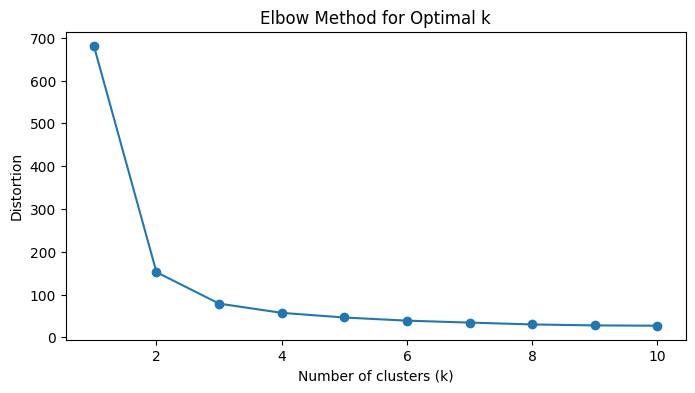

In [12]:
# Plot the elbow method to find the optimal number of clusters
def plot_elbow(X: np.array, from_k: int, to_k: int) -> None:
    """
    Plot the elbow method to find the optimal number of clusters
    :param X: the dataset
    :param from_k: the minimum number of clusters
    :param to_k: the maximum number of clusters (included)
    """
    distortions = []
    for k in range(from_k, to_k + 1):
        kmeans = KMeans(n_clusters=k, init='random', n_init='auto', random_state=random_state)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, to_k + 1), distortions, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Distortion')
    plt.title('Elbow Method for Optimal k')
    plt.show()

plot_elbow(X_dataset, from_k=1, to_k=10)

## ✨ Questions ✨

1. What is the $k$ value for the elbow point in the plot?
2. Does it coincide with the number of classes in the iris dataset?
3. What is the cause?

### Answers

*Write your answers here.*



## Clustering visualization

We now run the K-means algorithm with the know number of clusters ($k$=3). Then we visualize the clusters in a 2D plot together with the original labels given in the Iris dataset.

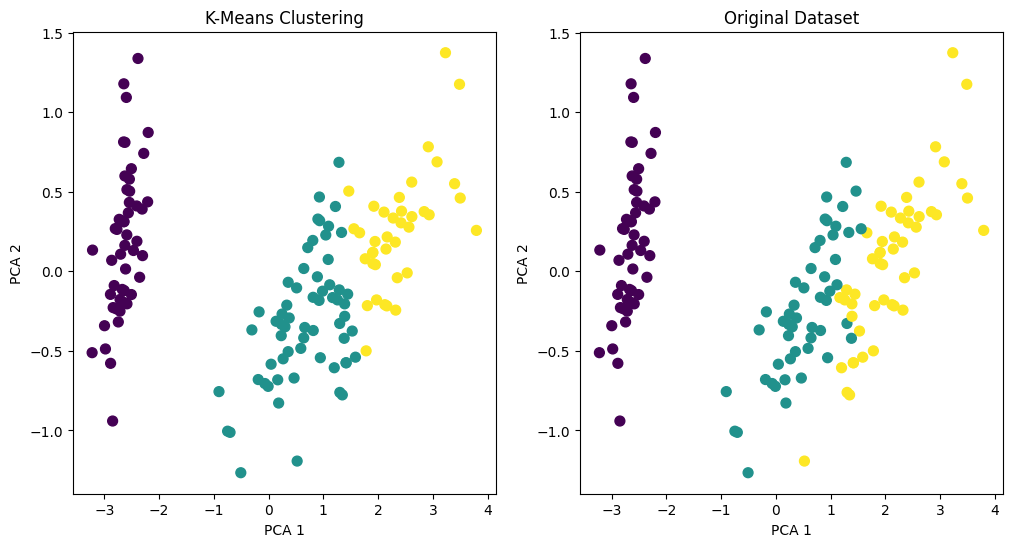

In [13]:
def compute_clusters(X: np.array, n_clusters: int) -> np.array:
    """
    Compute the clusters using K-Means
    :param X: the dataset
    :param n_clusters: the number of clusters
    :return: the cluster labels for each sample in the dataset
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    return kmeans.fit_predict(X)

clusters = compute_clusters(X_dataset, n_clusters=3)

def plot_clusters(X: np.array, clusters: np.array, y: np.array, title1: str, title2: str) -> None:
    """
    Plot the clusters (left) and the original dataset (right) in the same figure.
    The colors of the points represent the cluster labels (left) and the original labels (right).
    :param X: the dataset
    :param clusters: the cluster labels
    :param y: the original labels (setosa, virginica, versicolor)
    :param title1: title for the clusters plot
    :param title2: title for the original dataset plot
    """
    # reduce the features to 2D using PCA
    pca = PCA(2)
    X_pca = pca.fit_transform(X)
    plt.figure(figsize=(12, 6))
    # first plot
    plt.subplot(1, 2, 1)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50)  # s=50 is the size of the points
    plt.title(title1)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    # second plot
    plt.subplot(1, 2, 2)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50)
    plt.title(title2)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    # show the figure
    plt.show()

plot_clusters(X_dataset, clusters, y_dataset, 'K-Means Clustering', 'Original Dataset')

## ✨ Questions ✨

4. By just looking at the cluster plot, is the k-means algorithm performing well?
5. How well do the clusters separate the iris dataset?
6. Are the results coherent with the $k$ value found by the elbow method? Why?

### Answers

*Write your answers here.*



## Silhouette score

Let's compute and visualize the silhouette scores for $k$=2 to $k$=10.

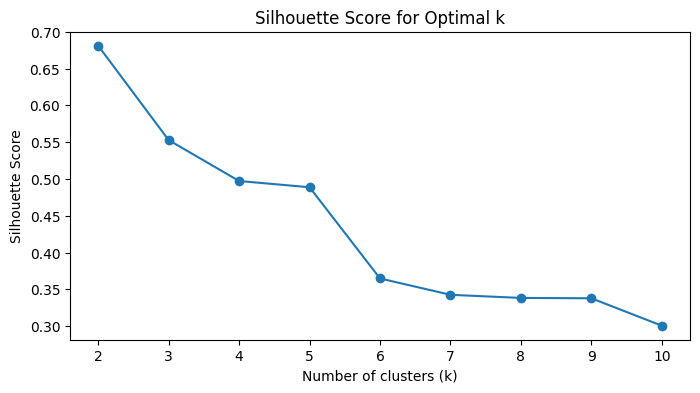

Silhouette Scores (k, score): [(2, 0.6810461692117462), (3, 0.5528190123564095), (4, 0.49721766487109753), (5, 0.4887488870931056), (6, 0.36483400396700255), (7, 0.34261342474240186), (8, 0.33836030286281205), (9, 0.3378944288475886), (10, 0.30060936850336784)]


In [14]:
def compute_silhouette_scores(X: np.array, from_k: int, to_k: int) -> np.array:
    """
    Compute the silhouette scores for k=from_k to k=to_k
    :param X: the dataset
    :param from_k: the minimum number of clusters
    :param to_k: the maximum number of clusters
    :return: a list with the silhouette scores for each k
    """
    scores = []
    for k in range(from_k, to_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        clusters = kmeans.fit_predict(X)
        score = silhouette_score(X, clusters)
        scores.append(score)
    # Plot the silhouette scores
    plt.figure(figsize=(8, 4))
    plt.plot(range(from_k, to_k + 1), scores, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score for Optimal k')
    plt.show()
    return scores

silhouette_scores = compute_silhouette_scores(X_dataset, 2, 10)
print("Silhouette Scores (k, score):", list(enumerate(silhouette_scores, 2)))

## ✨ Questions ✨

7. What is the best $k$ value according to the silhouette score?
8. Does it coincide with the elbow method?
9. Does it coincide with the number of classes in the iris dataset? Why?

### Answers

*Write your answers here.*

